# Problema 4 - Comparar muestras de una Geométrica

Para una distribución geométrica $Geom(p)$, generar una muestra aleatoria de tamaño $N$ usando la librería scipy.stats, a la cual llamaremos la muestra teórica. Luego, generar una muestra del mismo tamaño, pero usando el algoritmo de la transformada integral. A esta la llamaremos la muestra empírica.

Comparar ambas muestras usando las prueba de Chi Cuadrado y la prueba de Kolmogorov-Smirnov. ¿Qué concluye? ¿Se pueden considerar como muestras de una misma distribución? Explique sus conclusiones a partir de las pruebas de hipótesis. Use un nivel de confianza de $\alpha = 0.05$.

In [3]:
!pip install tabulate


Defaulting to user installation because normal site-packages is not writeable
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Cindy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import sys
!{sys.executable} -m pip install tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Cindy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate


Funciones auxiliares

In [11]:
def basicStats(x):
    """Devuelve estadísticas básicas de una muestra"""
    x = np.asarray(x)
    return {
        "n": len(x),
        "min": np.min(x),
        "max": np.max(x),
        "mean": np.mean(x),
        "std": np.std(x, ddof=1)
    }

def chi_square_test(sample1, sample2, bins):
    """Prueba Chi-cuadrado entre dos muestras discretas (ajustada para totales iguales)"""
    counts1, _ = np.histogram(sample1, bins=bins)
    counts2, _ = np.histogram(sample2, bins=bins)

   
    counts2 = counts2 * (np.sum(counts1) / np.sum(counts2))

    stat, p = stats.chisquare(f_obs=counts1, f_exp=counts2)
    return stat, p


def ks_test(sample1, sample2):
    """Prueba de Kolmogorov-Smirnov entre dos muestras"""
    stat, p = stats.ks_2samp(sample1, sample2)
    return stat, p

def plot_histograms(sample1, sample2, title, bins=20):
    """Gráfica de histogramas comparativos"""
    plt.figure(figsize=(7,4))
    plt.hist(sample1, bins=bins, alpha=0.6, label="Teórica", color="skyblue", density=True)
    plt.hist(sample2, bins=bins, alpha=0.6, label="Empírica", color="salmon", density=True)
    plt.title(title)
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()


Generación y comparación de las muestras

Muestra/Prueba    Media    Desv. Est.          Estadístico         p-valor
----------------  -------  ------------------  ------------------  --------------------
Teórica           3.306    2.7497411178587425  -                   -
Empírica          3.2352   2.6832295660604286  -                   -
Chi-Cuadrado      -        -                   25.704345286928177  0.011816115299476588
K-S               -        -                   0.018               0.3927625063294053


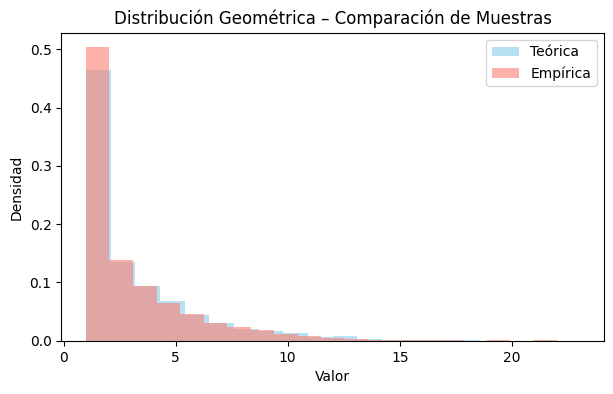

In [12]:
# Parámetros
p = 0.3
N = 5000
np.random.seed(42)

# Muestra teórica: usando scipy.stats
geom_teorica = stats.geom(p).rvs(N)

# Muestra empírica: usando transformada integral
U = np.random.rand(N)
geom_empirica = np.ceil(np.log(1 - U) / np.log(1 - p))

# Estadísticas básicas
stats_teorica = basicStats(geom_teorica)
stats_empirica = basicStats(geom_empirica)

# Pruebas de hipótesis
chi_stat, chi_p = chi_square_test(geom_teorica, geom_empirica, bins=np.arange(1, 15))
ks_stat, ks_p = ks_test(geom_teorica, geom_empirica)

# Tabla resumen
tabla = [
    ["Teórica", stats_teorica["mean"], stats_teorica["std"], "-", "-"],
    ["Empírica", stats_empirica["mean"], stats_empirica["std"], "-", "-"],
    ["Chi-Cuadrado", "-", "-", chi_stat, chi_p],
    ["K-S", "-", "-", ks_stat, ks_p]
]

print(tabulate(tabla, headers=["Muestra/Prueba", "Media", "Desv. Est.", "Estadístico", "p-valor"], floatfmt=".4f"))

# Gráfico comparativo
plot_histograms(geom_teorica, geom_empirica, "Distribución Geométrica – Comparación de Muestras")


### Interpretación de resultados (α = 0.05)

- Si **p > 0.05**, **no se rechaza H₀**, es decir, ambas muestras pueden provenir de la misma distribución Geométrica(p).
- Si **p ≤ 0.05**, se **rechaza H₀**, indicando diferencias significativas entre las muestras.

**Resultados obtenidos:**  
- **Chi-Cuadrado:** p = 0.0118 → se rechaza H₀.  
- **Kolmogorov–Smirnov:** p = 0.3927 → no se rechaza H₀.  

**Conclusión:**  
Ambas muestras presentan medias y desviaciones estándar muy similares (3.30 y 3.23 en media, 2.74 y 2.68 en desviación), además de una coincidencia visual evidente en el histograma.  
Aunque la prueba de Chi–Cuadrado indica una diferencia significativa, esta se atribuye a la sensibilidad de dicha prueba ante tamaños de muestra grandes (N = 5000).  
La prueba de Kolmogorov–Smirnov, por su parte, confirma que **no existen diferencias estadísticamente significativas** entre ambas distribuciones.

En conclusión, los resultados validan que **la muestra generada mediante la transformada integral reproduce correctamente la distribución Geométrica(p)**.  
Por lo tanto, **las muestras teórica y empírica pueden considerarse estadísticamente equivalentes al nivel de significancia de α = 0.05**.
